In [1]:
import os
import glob
import numpy as np
import pandas as pd
import folderstats
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

In [2]:
path_fig=os.getcwd()+'/paper/figures/'

In [3]:
df=folderstats.folderstats("./",ignore_hidden=True)

In [4]:
for k in range(df.shape[0]):
    if df.loc[k,"folder"]:
        suff='/'
    else:
        suff=''
    df.loc[k,"path"]=str(df.loc[k,"path"][2:])+suff
    df.loc[k,"name"]=str(df.loc[k,"name"])+suff

In [5]:
idx=df["extension"].isin(["cpp","h","None",None])
df=df[idx].copy()
idx=np.logical_not(df['name'].isin(["LICENSE","Makefile","Makefile2","lob"]))
df=df[idx].copy()

In [6]:
df.columns

Index(['id', 'path', 'name', 'extension', 'size', 'atime', 'mtime', 'ctime',
       'folder', 'num_files', 'depth', 'parent', 'uid'],
      dtype='object')

In [7]:
cols=['id', 'path', 'name', 'extension',  'folder', 'depth', 'parent',]
df=df[cols]
folders=["simulob/","src/","include/",]
idx=np.logical_or(df["folder"]==False,np.logical_and(df["folder"]==True,df["name"].isin(folders)))
df=df[idx]

In [8]:
idx=np.logical_not(df["depth"]>=4)
df=df[idx]

In [9]:
df.sort_values(by='id',inplace=True)
df.reset_index(inplace=True,drop=True)
df.reset_index(inplace=True)

In [10]:
df

,index,id,path,name,extension,folder,depth,parent
0,0,11,simulob/,simulob/,None,True,1,1
1,1,12,simulob/include/,include/,None,True,2,11
2,2,13,simulob/include/user.h,user,h,False,2,12
3,3,14,simulob/include/gui.h,gui,h,False,2,12
4,4,15,simulob/include/orderbook.h,orderbook,h,False,2,12
5,5,16,simulob/include/hawkes.h,hawkes,h,False,2,12
6,6,17,simulob/include/orders.h,orders,h,False,2,12
7,7,18,simulob/include/controller.h,controller,h,False,2,12
8,8,21,simulob/src/,src/,None,True,2,11
9,9,22,simulob/src/main.cpp,main,cpp,False,2,21


In [11]:
cols=list(df.columns)
cols[0]="pnt"
cols[3]='file'
df.columns=cols

In [12]:
# G.nodes.data()

In [13]:
keys=df.loc[:,["pnt","id"]].copy()

In [14]:
df.columns

Index(['pnt', 'id', 'path', 'file', 'extension', 'folder', 'depth', 'parent'], dtype='object')

In [15]:
cols=list(keys.columns)
cols[0]="par_pnt"
keys.columns=cols
#keys

In [16]:
df=df.merge(keys,how="left",left_on="parent",right_on="id").drop(columns=["id_y"])
idx=pd.isna(df["par_pnt"]).values
df.loc[idx,"par_pnt"]=-1
df["par_pnt"]=df["par_pnt"].astype(np.int)

In [17]:
df.columns

Index(['pnt', 'id_x', 'path', 'file', 'extension', 'folder', 'depth', 'parent',
       'par_pnt'],
      dtype='object')

In [18]:
df.drop(columns=["id_x","parent"],inplace=True)
cols=list(df.columns)
cols[0]="id"
cols[-1]="parent"
df.columns=cols

In [19]:
cols=list(df.columns)
newcols=[]
newcols.append(cols[0])
newcols.append(cols[5])
newcols.append(cols[2])
newcols.append(cols[3])
newcols.append(cols[-1])
newcols.append(cols[4])
newcols.append(cols[1])
df=df[newcols]

In [20]:
df[["id","depth","file","extension","parent","path"]]

,id,depth,file,extension,parent,path
0,0,1,simulob/,None,-1,simulob/
1,1,2,include/,None,0,simulob/include/
2,2,2,user,h,1,simulob/include/user.h
3,3,2,gui,h,1,simulob/include/gui.h
4,4,2,orderbook,h,1,simulob/include/orderbook.h
5,5,2,hawkes,h,1,simulob/include/hawkes.h
6,6,2,orders,h,1,simulob/include/orders.h
7,7,2,controller,h,1,simulob/include/controller.h
8,8,2,src/,None,0,simulob/src/
9,9,2,main,cpp,8,simulob/src/main.cpp


In [21]:
df[["id","depth","file","extension","parent","path"]].to_latex(index=False)

'\\begin{tabular}{rrllrl}\n\\toprule\n id &  depth &        file & extension &  parent &                          path \\\\\n\\midrule\n  0 &      1 &    simulob/ &      None &      -1 &                      simulob/ \\\\\n  1 &      2 &    include/ &      None &       0 &              simulob/include/ \\\\\n  2 &      2 &        user &         h &       1 &        simulob/include/user.h \\\\\n  3 &      2 &         gui &         h &       1 &         simulob/include/gui.h \\\\\n  4 &      2 &   orderbook &         h &       1 &   simulob/include/orderbook.h \\\\\n  5 &      2 &      hawkes &         h &       1 &      simulob/include/hawkes.h \\\\\n  6 &      2 &      orders &         h &       1 &      simulob/include/orders.h \\\\\n  7 &      2 &  controller &         h &       1 &  simulob/include/controller.h \\\\\n  8 &      2 &        src/ &      None &       0 &                  simulob/src/ \\\\\n  9 &      2 &        main &       cpp &       8 &          simulob/src/main.cpp 

In [22]:
df_cpp=df[np.logical_not(df['extension']=='h')].copy()
id_orderbook=int(df_cpp.loc[df_cpp["file"]=="orderbook","id"])
id_hawkes=int(df_cpp.loc[df_cpp["file"]=="hawkes","id"])
id_orders=int(df_cpp.loc[df_cpp["file"]=="orders","id"])
id_user=int(df_cpp.loc[df_cpp["file"]=="user","id"])
id_gui=int(df_cpp.loc[df_cpp["file"]=="gui","id"])
id_main=int(df_cpp.loc[df_cpp["file"]=="main","id"])
df_cpp["called_by"]=[{}]*len(df_cpp)
df_cpp.loc[df_cpp['file']=="orderbook", "called_by"]=[{0:id_main, 1: id_user,2:id_orders}]
df_cpp.loc[df_cpp['file']=='gui', "called_by"]=[{0:id_orderbook, 1:id_user}]
df_cpp.loc[df_cpp['file']=='user', "called_by"]={0:id_gui}
df_cpp.loc[df_cpp['file']=='hawkes', "called_by"]={0:id_orderbook}
df_cpp.loc[df_cpp['file']=='orders', "called_by"]={0:id_orderbook}

In [23]:
df_cpp

,id,depth,file,extension,parent,folder,path,called_by
0,0,1,simulob/,None,-1,True,simulob/,{}
1,1,2,include/,None,0,True,simulob/include/,{}
8,8,2,src/,None,0,True,simulob/src/,{}
9,9,2,main,cpp,8,False,simulob/src/main.cpp,{}
10,10,2,orderbook,cpp,8,False,simulob/src/orderbook.cpp,"{0: 9, 1: 11, 2: 12}"
11,11,2,user,cpp,8,False,simulob/src/user.cpp,{0: 14}
12,12,2,orders,cpp,8,False,simulob/src/orders.cpp,{0: 10}
13,13,2,hawkes,cpp,8,False,simulob/src/hawkes.cpp,{0: 10}
14,14,2,gui,cpp,8,False,simulob/src/gui.cpp,"{0: 10, 1: 11}"
15,15,2,controller,cpp,8,False,simulob/src/controller.cpp,{}


In [24]:
Gh=nx.DiGraph()
for i,row in df.iterrows():
#     print(row.file)
#     print(row.path)
    Gh.add_node(row.id,file=row.file,extension=row.extension)
    Gh.add_edge(max(row.parent,0),row.id,color='C0',relation='hierarchical')
Gc=nx.DiGraph()
for i,row in df_cpp.iterrows():
    for k in row.called_by.values():
        Gc.add_edge(k,row.id,color="red",relation="call")
print(nx.info(Gh))    

Name: 
Type: DiGraph
Number of nodes: 16
Number of edges: 16
Average in degree:   1.0000
Average out degree:   1.0000


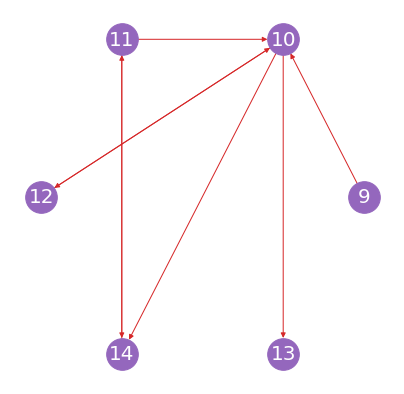

In [25]:
fig = plt.figure(figsize=(7, 7))
nx.draw_networkx(Gc,pos=nx.shell_layout(Gc),font_color="white",edge_color="C3",node_color="C4",node_size=1000, font_size=20)
plt.axis('off')
fname=path_fig+'simulob_callG.png'
# plt.savefig(fname)
plt.draw()

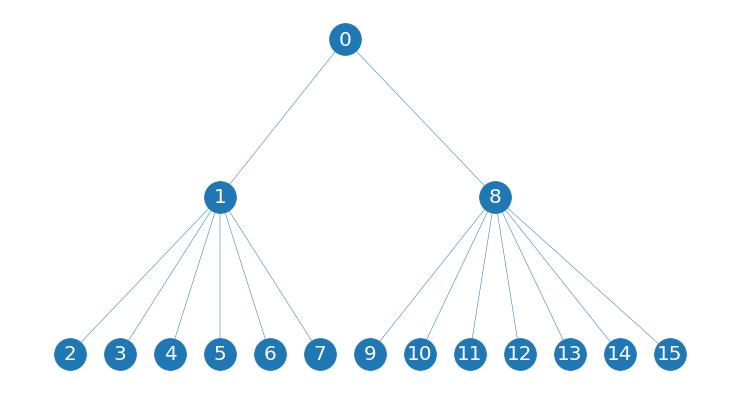

In [26]:
pos_dot = graphviz_layout(Gh, prog='dot')
fig = plt.figure(figsize=(13, 7))
nodes = nx.draw_networkx_nodes(Gh, pos_dot, node_size=1000, node_color='C0')
edges = nx.draw_networkx_edges(Gh, pos_dot,  edge_color="C0",width=0.5)
labels = nx.draw_networkx_labels(Gh, pos_dot, font_color="white", font_size=20)
plt.axis('off')
fname=path_fig+'simulob_hierG.png'
# plt.savefig(fname)
plt.show()

In [27]:
di = pd.DataFrame([
    ['Order', ['tController'], []],
    ['StandingOrder', ['Order'], []]
])
di[3] = ['orders.h']*len(di)
df_inherit = di.copy()

In [28]:
di = pd.DataFrame([
    ['BestPrice', ['Controller'], []],
    ['OrderQueue', ['std::deque<std::shared_ptr<Order>>', 'Controller'], ['BestPrice']],
    ['OrderBook', ['tController'],['OrderQueue'] ],
    ['OrderSubmission', ['tController'], ['OrderBook',  'HawkesProcess','User']]
])
di[3] = ['orderbook.h']*len(di)
df_inherit = pd.concat([df_inherit, di])

In [29]:
di = pd.DataFrame([
    ['HawkesProcess', ['Controller'], []],
])
di[3] = ['hawkes.h']*len(di)
df_inherit = pd.concat([df_inherit, di])

In [30]:
di = pd.DataFrame([
    ['User', ['Controller'], []],
])
di[3] = ['user.h']*len(di)
df_inherit = pd.concat([df_inherit, di])

In [31]:
di = pd.DataFrame([
    ['std::deque<std::shared_ptr<Order>>', [], ['Order'], '<deque>']
])
df_inherit = pd.concat([df_inherit, di])

In [32]:
di = pd.DataFrame([['Controller', [] , []],
                           ['tController', ['Controller'], []],
                           ['BookMonitor', ['tController'], []],
                          ])
di[3] = ['controller.h']*len(di)
df_inherit = pd.concat([df_inherit, di])

In [33]:
di = pd.DataFrame([
    ['SubWindow', [], []],
    ['UserWindow', ['SubWindow'], [] ],
    ['SparrowWindow', ['SubWindow'], [] ]
])
di[3] = ['gui.h']*len(di)
df_inherit = pd.concat([df_inherit, di])

In [34]:
df_inherit.columns = ['class', 'inherits_from', 'owns', 'declared_in']
df_inherit.reset_index(drop=True, inplace=True)
df_inherit['id'] = df_inherit.index.values

In [35]:
df_inherit

,class,inherits_from,owns,declared_in,id
0,Order,[tController],[],orders.h,0
1,StandingOrder,[Order],[],orders.h,1
2,BestPrice,[Controller],[],orderbook.h,2
3,OrderQueue,"[std::deque<std::shared_ptr<Order>>, Controller]",[BestPrice],orderbook.h,3
4,OrderBook,[tController],[OrderQueue],orderbook.h,4
5,OrderSubmission,[tController],"[OrderBook, HawkesProcess, User]",orderbook.h,5
6,HawkesProcess,[Controller],[],hawkes.h,6
7,User,[Controller],[],user.h,7
8,std::deque<std::shared_ptr<Order>>,[],[Order],<deque>,8
9,Controller,[],[],controller.h,9


In [36]:
df_inherit = df_inherit[['id', 'class', 'declared_in', 'inherits_from', 'owns']]

In [37]:
df_inherit

,id,class,declared_in,inherits_from,owns
0,0,Order,orders.h,[tController],[]
1,1,StandingOrder,orders.h,[Order],[]
2,2,BestPrice,orderbook.h,[Controller],[]
3,3,OrderQueue,orderbook.h,"[std::deque<std::shared_ptr<Order>>, Controller]",[BestPrice]
4,4,OrderBook,orderbook.h,[tController],[OrderQueue]
5,5,OrderSubmission,orderbook.h,[tController],"[OrderBook, HawkesProcess, User]"
6,6,HawkesProcess,hawkes.h,[Controller],[]
7,7,User,user.h,[Controller],[]
8,8,std::deque<std::shared_ptr<Order>>,<deque>,[],[Order]
9,9,Controller,controller.h,[],[]


In [38]:
df_inherit.to_latex(index=False)

'\\begin{tabular}{rllll}\n\\toprule\n id &                               class &   declared\\_in &                                     inherits\\_from &                              owns \\\\\n\\midrule\n  0 &                               Order &      orders.h &                                     [tController] &                                [] \\\\\n  1 &                       StandingOrder &      orders.h &                                           [Order] &                                [] \\\\\n  2 &                           BestPrice &   orderbook.h &                                      [Controller] &                                [] \\\\\n  3 &                          OrderQueue &   orderbook.h &  [std::deque<std::shared\\_ptr<Order>>, Controller] &                       [BestPrice] \\\\\n  4 &                           OrderBook &   orderbook.h &                                     [tController] &                      [OrderQueue] \\\\\n  5 &                     OrderSub

In [39]:
inherit_links=[]
for i,row in df_inherit.iterrows():
    inherit_links.append(
        [int(np.squeeze(df_inherit.loc[df_inherit['class']==cl,'id'].values)) for cl in row['inherits_from'] ]
    )
df_inherit['inherit_links'] = inherit_links

/home/claudio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
own_links=[]
for i,row in df_inherit.iterrows():
    own_links.append(
        [int(np.squeeze(df_inherit.loc[df_inherit['class']==cl,'id'].values)) for cl in row['owns'] ]
    )
df_inherit['own_links'] = own_links

/home/claudio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
df_inherit

,id,class,declared_in,inherits_from,owns,inherit_links,own_links
0,0,Order,orders.h,[tController],[],[10],[]
1,1,StandingOrder,orders.h,[Order],[],[0],[]
2,2,BestPrice,orderbook.h,[Controller],[],[9],[]
3,3,OrderQueue,orderbook.h,"[std::deque<std::shared_ptr<Order>>, Controller]",[BestPrice],"[8, 9]",[2]
4,4,OrderBook,orderbook.h,[tController],[OrderQueue],[10],[3]
5,5,OrderSubmission,orderbook.h,[tController],"[OrderBook, HawkesProcess, User]",[10],"[4, 6, 7]"
6,6,HawkesProcess,hawkes.h,[Controller],[],[9],[]
7,7,User,user.h,[Controller],[],[9],[]
8,8,std::deque<std::shared_ptr<Order>>,<deque>,[],[Order],[],[0]
9,9,Controller,controller.h,[],[],[],[]


In [42]:
Gclass=nx.DiGraph()
for i,row in df_inherit.iterrows():
#     print(row['class'])
# #     print(row.path)
    Gclass.add_node(row['id'],)
    for f in row['inherit_links']:
        Gclass.add_edge(f, row['id'],color='C0',relation='hierarchical')
#     for f in row['own_links']:
#         Gclass.add_edge(row['id'], f,color='C3',relation='ownership')

In [43]:
Gown=nx.DiGraph()
for i,row in df_inherit.iterrows():
#     print(row['class'])
# #     print(row.path)
#     Gown.add_node(row['id'],)
    for f in row['own_links']:
        Gown.add_edge(row['id'], f,color='C3',relation='ownership')

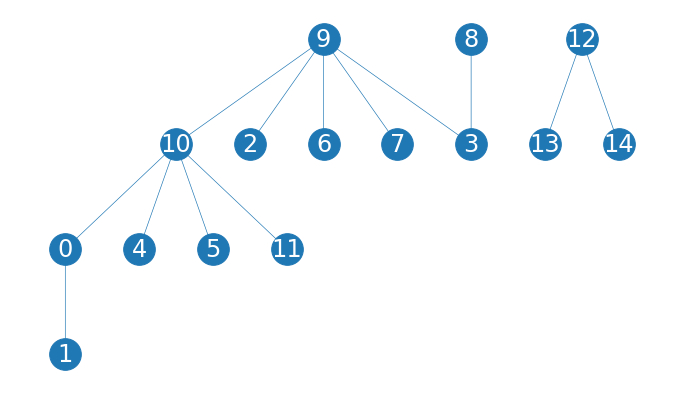

In [44]:
pos_dot = graphviz_layout(Gclass, prog='dot')
fig = plt.figure(figsize=(12, 7))
nodes = nx.draw_networkx_nodes(Gclass, pos_dot, node_size=1000, node_color='C0')
edges = nx.draw_networkx_edges(Gclass, pos_dot,  edge_color='C0', width=0.65)
labels = nx.draw_networkx_labels(Gclass, pos_dot, font_color="white", font_size=24)
plt.axis('off')
fname=path_fig+'simulob_classG.png'
plt.savefig(fname)
plt.show()

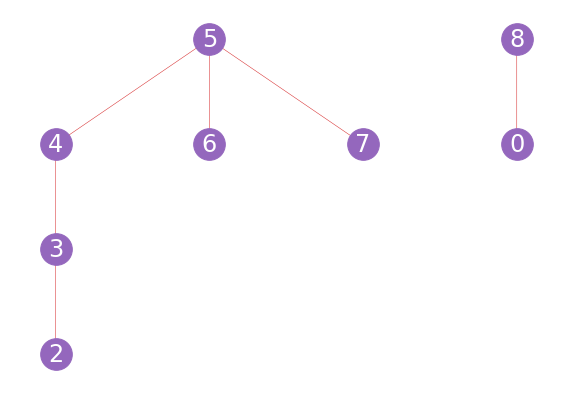

In [45]:
pos_dot = graphviz_layout(Gown, prog='dot')
fig = plt.figure(figsize=(10, 7))
nodes = nx.draw_networkx_nodes(Gown, pos_dot, node_size=1000, node_color='C4')
edges = nx.draw_networkx_edges(Gown, pos_dot,  edge_color='C3', width=0.5)
labels = nx.draw_networkx_labels(Gown, pos_dot, font_color="white", font_size=24)
plt.axis('off')
fname=path_fig+'simulob_ownG.png'
plt.savefig(fname)
plt.show()